In [43]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import geopandas as gpd
import seaborn as sns

In [56]:
ki_old = read_csv('Combined-concat-before-karst-trim.csv', index_col='huc12')
ki_old.dropna(inplace=True, subset=['geometry'])
ki_old['geometry'] = gpd.GeoSeries.from_wkt(ki_old.geometry)
ki_old = gpd.GeoDataFrame(ki_old)
ki_old.drop_duplicates(inplace=True)
ki_old = ki_old[~ki_old.index.duplicated(keep='first')]
ki_old = ki_old[ki_old.p_karst>0]


ki = read_csv('Combined-concat.csv', index_col='huc12')
ki.dropna(inplace=True, subset=['geometry'])
ki['geometry'] = gpd.GeoSeries.from_wkt(ki.geometry)
ki = gpd.GeoDataFrame(ki)
ki.drop_duplicates(inplace=True)
ki = ki[~ki.index.duplicated(keep='first')]
ki = ki[ki.p_karst>0]


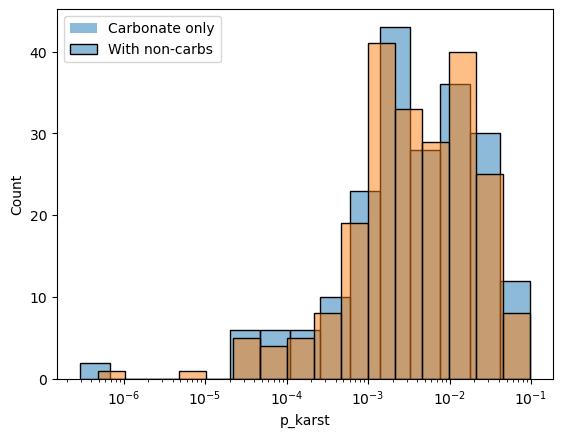

In [58]:

sns.histplot(ki, x='p_karst', log_scale=True, alpha=0.5)
sns.histplot(ki_old, x='p_karst', log_scale=True, alpha=0.5)
#plt.legend(['Carbonate only','With non-carbs'])

In [59]:
p_k_ratio = ki.p_karst/ki_old.p_karst

Text(0.5, 0, 'p_carb only / p_full_huc')

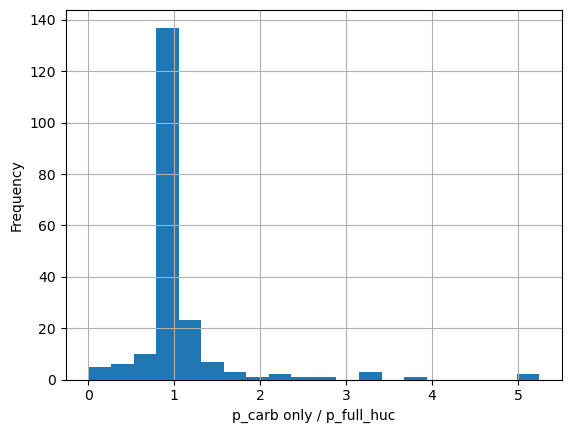

In [64]:
p_k_ratio.hist(bins=20)
plt.ylabel('Frequency')
plt.xlabel('p_carb only / p_full_huc')